In [1]:
pip install shapely


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install sentinelhub

  Using cached tomli-2.0.1-py3-none-any.whl (12 kB)
  Created wheel for utm: filename=utm-0.7.0-py3-none-any.whl size=6093 sha256=dc5746e64042f953ee1a4a22fd3c723fcb05a067d9d8b7adab98d92e31fc1029
  Stored in directory: c:\users\mihir trivedi\appdata\local\pip\cache\wheels\65\e2\d8\878a8cc986641056fbfebefc4d8eb64238a7b6d3426e86b447
Successfully built utm
  Attempting uninstall: pillow
    Found existing installation: Pillow 8.2.0
    Uninstalling Pillow-8.2.0:
      Successfully uninstalled Pillow-8.2.0
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install sentinelhub[AWS]

In [4]:
conda install -c conda-forge sentinelhub

^C

Note: you may need to restart the kernel to use updated packages.


In [4]:
import logging

logging.basicConfig(level=logging.DEBUG)
logging.captureWarnings(True)


In [5]:
from sentinelhub import SHConfig   
config = SHConfig()
config.sh_client_id = "35c2e8f8-8796-450a-9770-f4e481949986"
config.sh_client_secret = "Y*X?HpB9W4N&#lWKt!1CQL3cj-)r(6M{n}Nuj6QD"

config.save()


DEBUG:shapely.geos:Found GEOS DLL: <CDLL 'C:\anaconda\lib\site-packages\Shapely.libs\geos_c-84d02d5b10aa37e3ab60a885dc5b531b.dll', handle 7ffa14320000 at 0x1fb5c7ddeb0>, using it.
  warnings.warn(



In [12]:
from sentinelhub import SHConfig

config = SHConfig()

if not config.sh_client_id or not config.sh_client_secret:
    print("Warning! To use Process API, please provide the credentials (OAuth client ID and client secret).")


In [13]:
import datetime
import os

import matplotlib.pyplot as plt
import numpy as np

from sentinelhub import (
    CRS,
    BBox,
    DataCollection,
    DownloadRequest,
    MimeType,
    MosaickingOrder,
    SentinelHubDownloadClient,
    SentinelHubRequest,
    bbox_to_dimensions,
)


In [51]:
coords_wgs84 = (-64.495583,-31.459858,-64.234829,-31.351585)


In [52]:
resolution = 60
coords_bbox = BBox(bbox=coords_wgs84, crs=CRS.WGS84)
coords_size = bbox_to_dimensions(coords_bbox, resolution=resolution)

print(f"Image shape at {resolution} m resolution: {coords_size} pixels")


Image shape at 60 m resolution: (411, 205) pixels


In [53]:
evalscript_true_color = """
    //VERSION=3

    function setup() {
        return {
            input: [{
                bands: ["B02", "B03", "B04"]
            }],
            output: {
                bands: 3
            }
        };
    }

    function evaluatePixel(sample) {
        return [sample.B04, sample.B03, sample.B02];
    }
"""

request_true_color = SentinelHubRequest(
    evalscript=evalscript_true_color,
    input_data=[
        SentinelHubRequest.input_data(
            data_collection=DataCollection.SENTINEL2_L1C,
            time_interval=("2023-10-09", "2023-10-09"),
        )
    ],
    responses=[SentinelHubRequest.output_response("default", MimeType.PNG)],
    bbox=coords_bbox,
    size=coords_size,
    config=config,
)


In [54]:
true_color_imgs = request_true_color.get_data()


DEBUG:sentinelhub.download.sentinelhub_client:Sending POST request to https://services.sentinel-hub.com/api/v1/process. Hash of sent request is 71e0648786dfe14e451a0922334065ad
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): services.sentinel-hub.com:443
DEBUG:urllib3.connectionpool:https://services.sentinel-hub.com:443 "POST /api/v1/process HTTP/1.1" 200 None
DEBUG:sentinelhub.download.sentinelhub_client:Successful POST request to https://services.sentinel-hub.com/api/v1/process
DEBUG:PIL.PngImagePlugin:STREAM b'IHDR' 16 13
DEBUG:PIL.PngImagePlugin:STREAM b'IDAT' 41 32768


In [55]:
print(f"Returned data is of type = {type(true_color_imgs)} and length {len(true_color_imgs)}.")
print(f"Single element in the list is of type {type(true_color_imgs[-1])} and has shape {true_color_imgs[-1].shape}")


Returned data is of type = <class 'list'> and length 1.
Single element in the list is of type <class 'numpy.ndarray'> and has shape (205, 411, 3)


Image type: uint8


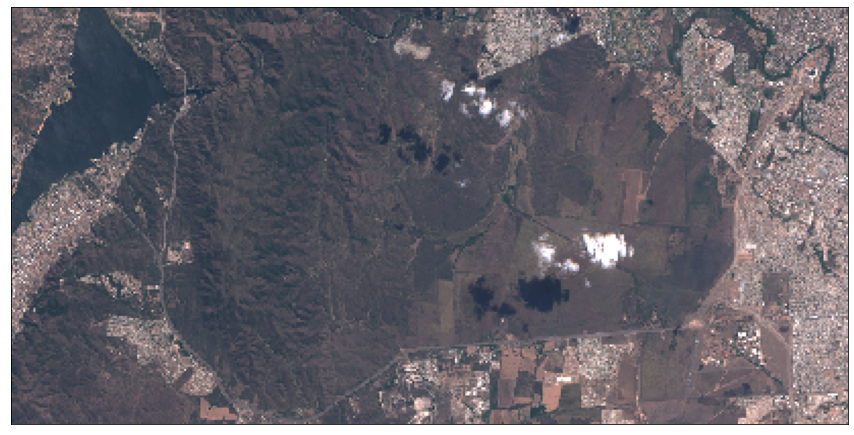

In [56]:
from utils import plot_image

image = true_color_imgs[0]
print(f"Image type: {image.dtype}")

# plot function
# factor 1/255 to scale between 0-1
# factor 3.5 to increase brightness
plot_image(image, factor=3.5 / 255, clip_range=(0, 1))



In [57]:
data_with_cloud_mask = request_true_color.get_data()


DEBUG:sentinelhub.download.sentinelhub_client:Sending POST request to https://services.sentinel-hub.com/api/v1/process. Hash of sent request is 71e0648786dfe14e451a0922334065ad
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): services.sentinel-hub.com:443
DEBUG:urllib3.connectionpool:https://services.sentinel-hub.com:443 "POST /api/v1/process HTTP/1.1" 200 None
DEBUG:sentinelhub.download.sentinelhub_client:Successful POST request to https://services.sentinel-hub.com/api/v1/process
DEBUG:PIL.PngImagePlugin:STREAM b'IHDR' 16 13
DEBUG:PIL.PngImagePlugin:STREAM b'IDAT' 41 32768


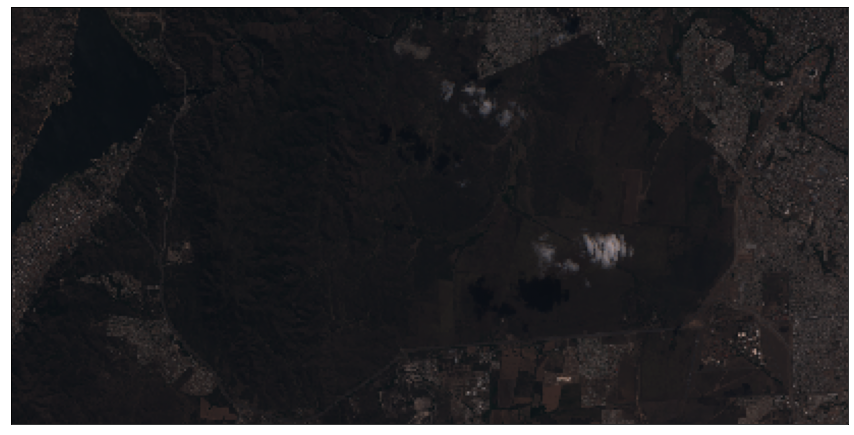

In [58]:
plot_image(data_with_cloud_mask[0], factor=1 / 255)
